<a href="https://colab.research.google.com/github/bhojaram/TheSparkFoundation/blob/main/EDA_Terrorism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GRIP TheSpark Foundation
# Task 4 : Exploratory Data Analysis on Terrorism
# Author : Bhojaram SA

In [1]:
#import necessary library

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Reading csv file and create a dataframe**

In [6]:
#create a dataframe by reading csv file from google drive

from google.colab import drive
drive.mount('/content/drive')

# Read the CSV file from Google Drive
df = pd.read_csv('/content/drive/My Drive/TheSparkFoundation/globalterrorism.csv', encoding='latin1')
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-6-201199f35549>:7: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/My Drive/TheSparkFoundation/globalterrorism.csv', encoding='latin1')


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


**EDA and data pre-processing**

In [7]:
 df.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [8]:
df.shape

(181691, 135)

In [9]:
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [11]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

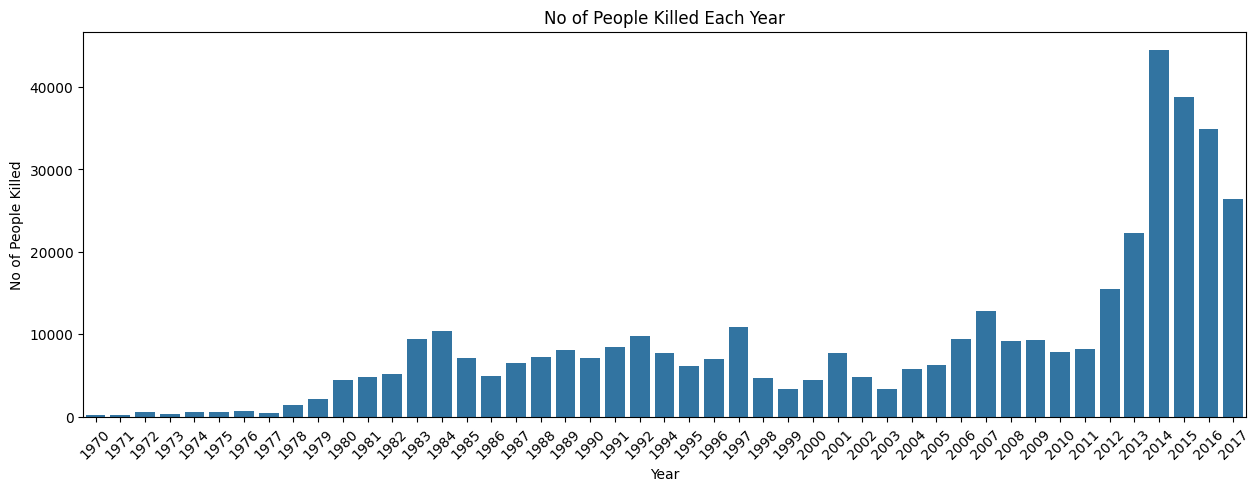

In [20]:
# Group data by 'iyear' and sum the 'nkill' column
df1 = df.groupby('iyear')['nkill'].sum().reset_index()

# Rename columns for better readability
df1.columns = ['Year', 'People_killed']

# Plot the data
plt.figure(figsize=(15, 5))
sns.barplot(x='Year', y='People_killed', data=df1)
plt.xlabel('Year')
plt.ylabel('No of People Killed')
plt.title('No of People Killed Each Year')
plt.xticks(rotation=45)
plt.show()

# **Observation:**
**In the above plot(No of People Killed vs. Year), year 2014 was the deadliest.Highest no of people killed.**

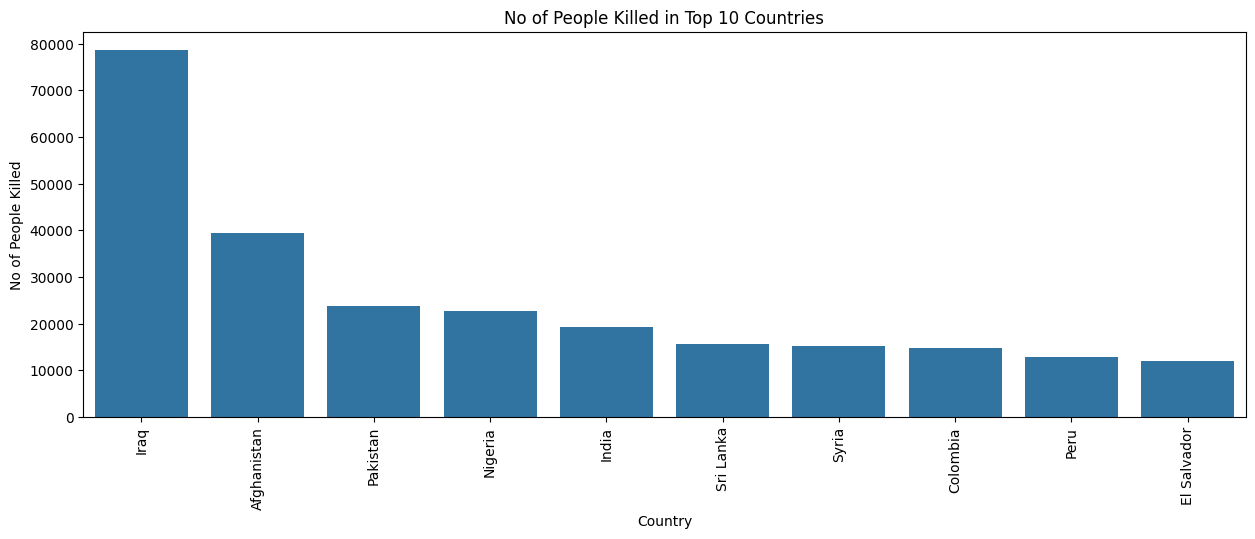

In [26]:
#country wise no of people killed  and plot that, split the data and plot

# Group data by 'country_txt' and sum the 'nkill' column
df2 = df.groupby('country_txt')['nkill'].sum().reset_index()

# Rename columns for better readability
df2.columns = ['Country', 'People_killed']

# Sort data by 'People_killed' in descending order
df2 = df2.sort_values(by='People_killed', ascending=False)



# Plot the data for the first 10 countries
plt.figure(figsize=(15, 5))
sns.barplot(x='Country', y='People_killed', data=df2_part1)
plt.xlabel('Country')
plt.ylabel('No of People Killed')
plt.title('No of People Killed in Top 10 Countries')
plt.xticks(rotation=90)
plt.show()




# **Observation**
**In the above plot(Country vs No. of people killed), Iraq is the country with most people killed followed by Afghanistan ans Pakistan**

<ipython-input-28-4411c93ee525>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='People_killed', data=df2_top10, palette='viridis')


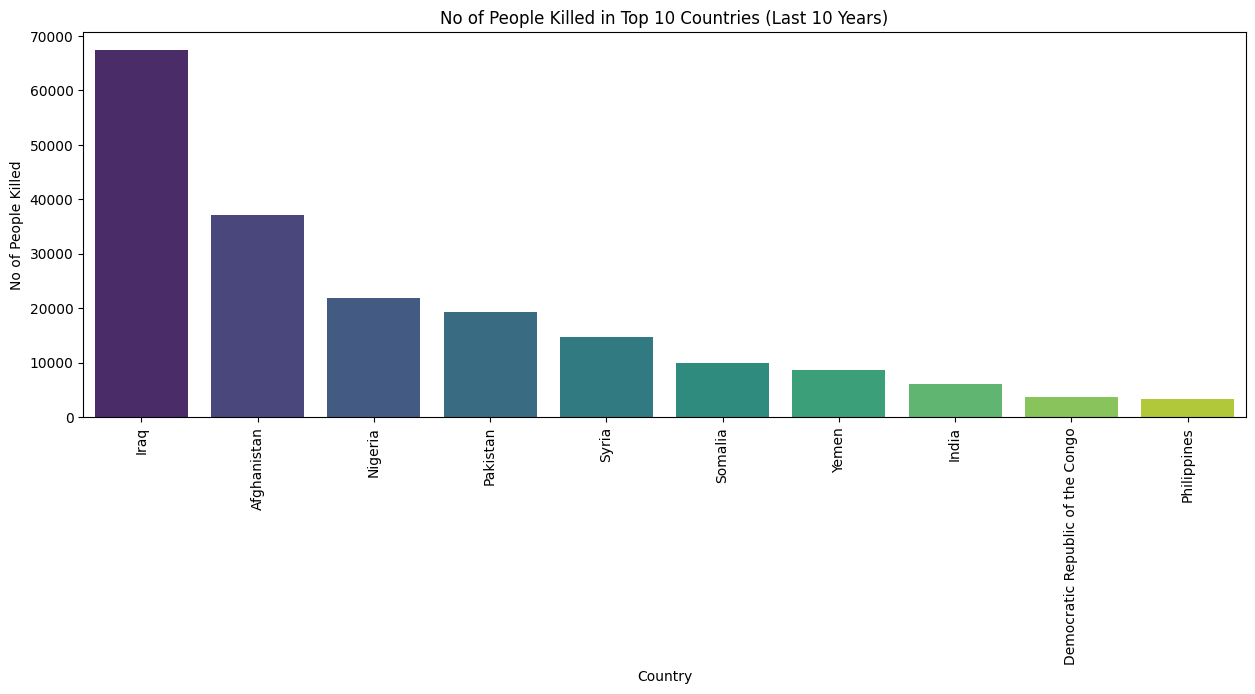

In [28]:
# Filter data for the last 10 years
recent_years = df[df['iyear'] >= df['iyear'].max() - 10]

# Group data by 'country_txt' and sum the 'nkill' column for the recent years
df2 = recent_years.groupby('country_txt')['nkill'].sum().reset_index()

# Rename columns for better readability
df2.columns = ['Country', 'People_killed']

# Sort data by 'People_killed' in descending order
df2 = df2.sort_values(by='People_killed', ascending=False)

# Select top 10 countries
df2_top10 = df2.head(10)

# Plot the data for the top 10 countries
plt.figure(figsize=(15, 5))
sns.barplot(x='Country', y='People_killed', data=df2_top10, palette='viridis')
plt.xlabel('Country')
plt.ylabel('No of People Killed')
plt.title('No of People Killed in Top 10 Countries (Last 10 Years)')
plt.xticks(rotation=90)
plt.show()

# **Observation**
**Above plot shows data of No. of people killed in last 10 yrs for Country**
**Iraq, Afghanistan and Nigeria are the most affected countries**

# **Mode of Terror Attack and Analysis**

In [33]:
df['attacktype1_txt'].describe()

df.groupby('attacktype1_txt')['iyear'].count().sort_values(ascending=False)


attacktype1_txt
Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: iyear, dtype: int64

count                181691
unique                    9
top       Bombing/Explosion
freq                  88255
Name: attacktype1_txt, dtype: object


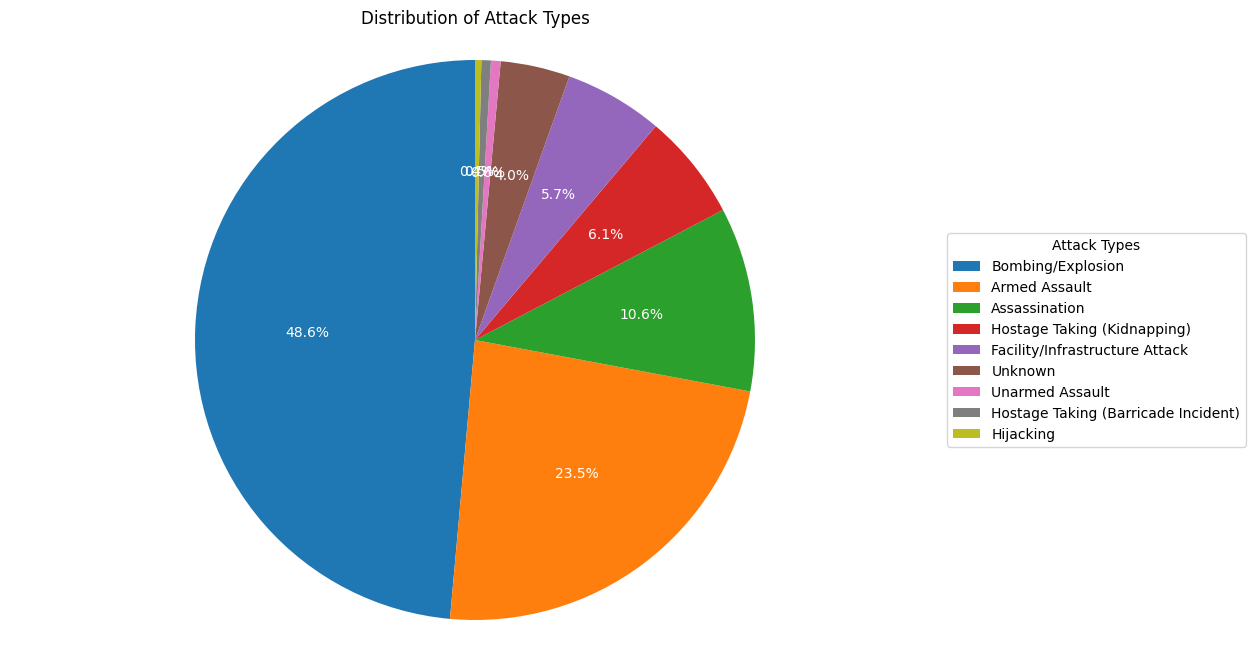

In [38]:
# Describe the 'attacktype1_txt' column
attacktype_description = df['attacktype1_txt'].describe()
print(attacktype_description)

# Group data by 'attacktype1_txt' and count occurrences
attack_types = df.groupby('attacktype1_txt').size().reset_index(name='count')

# Sort data by count in descending order
attack_types = attack_types.sort_values(by='count', ascending=False)

# Create a pie chart with all attack types
plt.figure(figsize=(12, 8))
wedges, texts, autotexts = plt.pie(
    attack_types['count'], labels=None, autopct='%1.1f%%', startangle=90, textprops=dict(color="w")
)
plt.legend(wedges, attack_types['attacktype1_txt'], title="Attack Types", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Distribution of Attack Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# **Observation**
**Bombing/Explosion(48.6%) and Armes Assault(23.5%) are prime mode of Terror Attack. Where as Hijacking prefered the least**

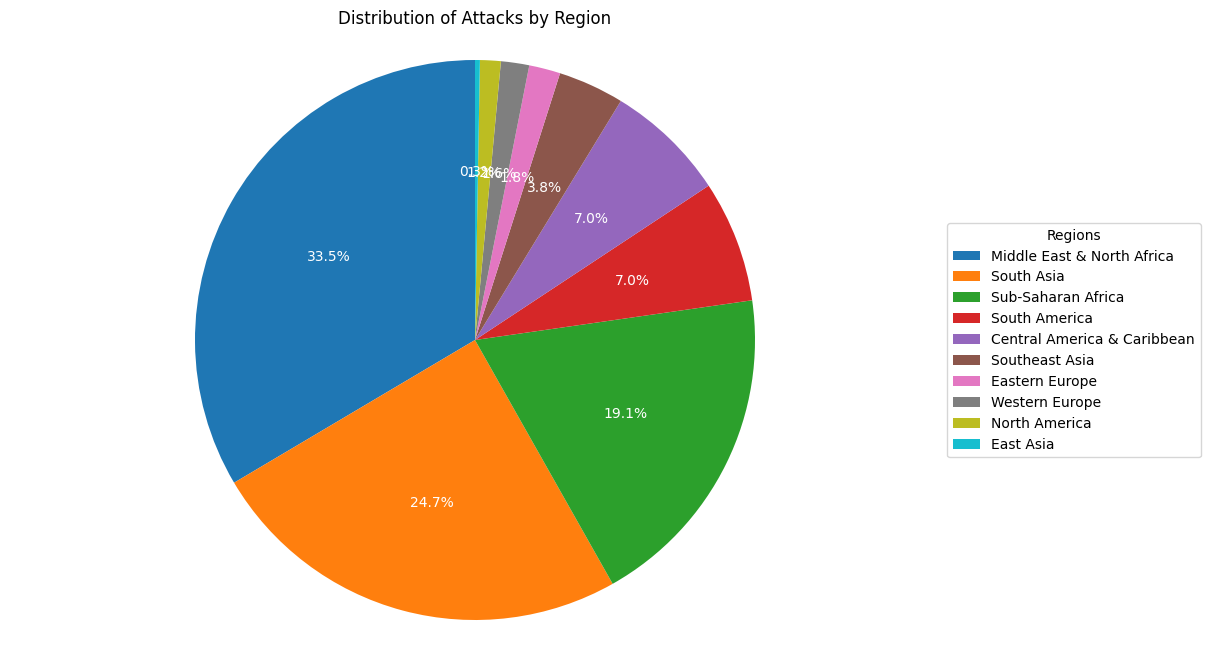

In [40]:
# prompt: show region data

# Group data by 'region_txt' and sum the 'nkill' column
df3 = df.groupby('region_txt')['nkill'].sum().reset_index()

# Rename columns for better readability
df3.columns = ['Region', 'People_killed']

# Sort data by 'People_killed' in descending order
df3 = df3.sort_values(by='People_killed', ascending=False)

# Create a pie chart with the top 10 regions
plt.figure(figsize=(12, 8))
wedges, texts, autotexts = plt.pie(
    df3['People_killed'][:10], labels=None, autopct='%1.1f%%', startangle=90, textprops=dict(color="w")
)
plt.legend(wedges, df3['Region'][:10], title="Regions", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Distribution of Attacks by Region')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


# **Observation**
**Middle East and North Africa is the most unsafe region where as East Asia region is quite safe place**